In [4]:
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC,SVR,SVC,LinearSVR
powers = [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]
zoomed = np.array(range(1,101))

In [2]:
titanic = pd.read_csv('Downloads/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
pd.get_dummies(titanic,columns=['Sex','Embarked'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,1,0,1,0,0


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
titanic['Age'].fillna(np.mean(titanic['Age']),inplace=True)

In [14]:
titanic['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [26]:
titanic['Embarked'].fillna(mode(titanic['Embarked']).mode[0],inplace=True)

In [22]:
mode(titanic['Embarked']).mode[0]

'S'

In [27]:
titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [30]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


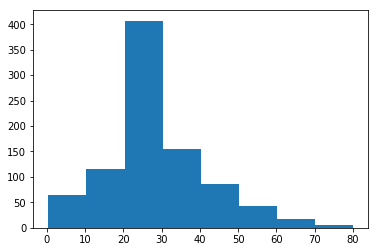

In [33]:
plt.hist(titanic['Age'],bins=8)
plt.show()

In [37]:
cancer=datasets.load_breast_cancer()

In [38]:
x,y=cancer.data,cancer.target

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
#supervised learnig

you need to predict some value 
you have train data with correct answer
your algorithm nees to predict for new data that column value


#unsupervised learing


In [7]:
iris=datasets.load_iris()

In [8]:
X,y=iris.data,iris.target

In [9]:
X_2d=X[:,[2,3]]

X_2d

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

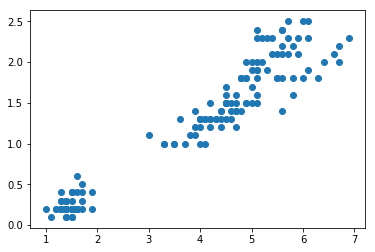

In [10]:
plt.scatter(X_2d[:,0],X_2d[:,1])

plt.show()

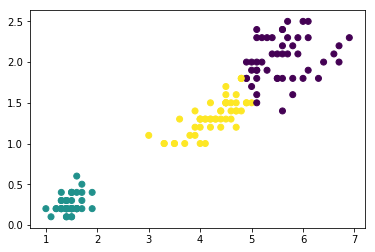

In [11]:
model=KMeans(n_clusters=3)
model.fit(X_2d)
labels=model.predict(X_2d)
plt.scatter(X_2d[:,0],X_2d[:,1],c=labels)
plt.show()

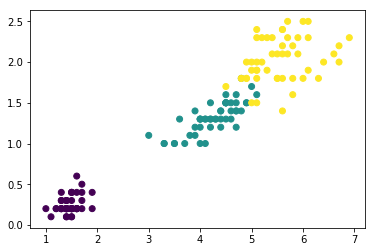

In [12]:
plt.scatter(X_2d[:,0],X_2d[:,1],c= y)
plt.show()

In [13]:
labels

df=pd.DataFrame({'species':y,'labels':labels})
pd.crosstab(df.species,df.labels)

labels,0,1,2
species,,,
0,0,50,0
1,2,0,48
2,46,0,4


In [14]:
for i in range(len(iris.target_names)):
    df.species.replace(i,iris.target_names[i],inplace=True)

pd.crosstab(df.species,df.labels)

labels,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,46,0,4


In [ ]:
1)select n random points as cluster center
2) classify the points into clusters
based on which center  is closest to each points
3) new cluster centers are cetroid  f each cluster points
4) keep repeatig step 2 and 3 till cluster o longer change


In [15]:
model.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [71]:
wine=datasets.load_wine()
X,y=wine.data,wine.target
model=KMeans(n_clusters=3)
model.fit(X)
labels= model.predict(X)
df=pd.DataFrame({'wines': y,'labels':labels})
pd.crosstab(df.wines,df.labels)

labels,0,1,2
wines,,,
0,0,46,13
1,50,1,20
2,19,0,29


In [72]:
X_scaled =StandardScaler().fit_transform(X)
model.fit(X_scaled)
labels= model.predict(X_scaled)
df=pd.DataFrame({'wines': y,'labels':labels})
pd.crosstab(df.wines,df.labels)

labels,0,1,2
wines,,,
0,0,59,0
1,3,3,65
2,48,0,0


In [73]:
#TSNE 
WE HAVE N DIMENSIONAL DATA n=10,15,30

TSNE
it maps n dimensional points to 2D
trying to keep distaces as closed to orignal as pssible

SyntaxError: invalid syntax (<ipython-input-73-70d2b3c2ba4b>, line 2)

In [74]:
X_tsne=TSNE().fit_transform(X)

In [75]:
X.shape

(178, 13)

In [76]:
X_tsne.shape

(178, 2)

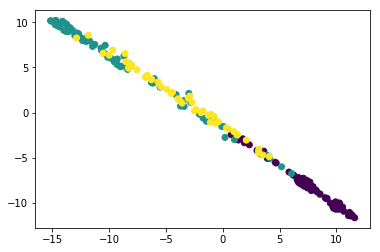

In [77]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y)
plt.show()

In [18]:
wine=datasets.load_wine()
X,y=wine.data,wine.target

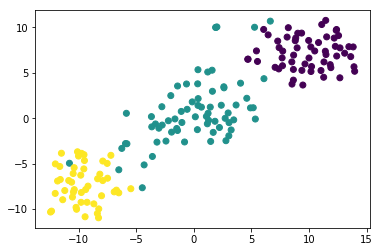

In [17]:
X_scaled = StandardScaler().fit_transform(X)
X_tsne_scaled = TSNE(random_state=42).fit_transform(X_scaled)
plt.scatter(X_tsne_scaled[:,0],X_tsne_scaled[:,1],c=y)
plt.show()

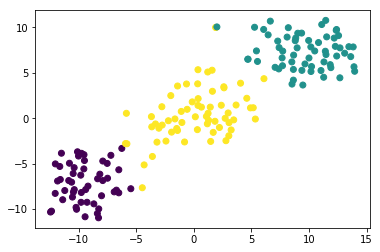

In [89]:
plt.scatter(X_tsne_scaled[:,0],X_tsne_scaled[:,1],c=labels)
plt.show()

In [ ]:
PCA-
Principal component Analysis

average house price prediction

no of males in area 
no of female in area
no_of_peopel in area

itrinsic dimesin -1

embarked s
embarked c
embarked q

intrinsic dimesion-2

In [2]:
boston =datasets.load_boston()
x,y=boston.data,boston.target

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
cancer=datasets.load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
1)storage space is less
2)10 columns,30 columns -> calculate time decrease by a lot
3)Noisy columns ,information you can remove ,which might actually help prevent overfittin
and perform better on train

SyntaxError: invalid syntax (<ipython-input-5-b294f4157288>, line 1)

In [6]:
y=b+a1*x1+a2*x2......
x1->x1-c

y=b+a1*(x1-c)+a2*x2
=(b-a1*c)+a1*x1

SyntaxError: invalid syntax (<ipython-input-6-3b57b939e9b4>, line 1)

In [7]:
#cancer=datasets.load_breast_cancer()
X=cancer.data
y=cancer.target

In [8]:
X_scaled =StandardScaler().fit_transform(X)

In [9]:
pca=PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

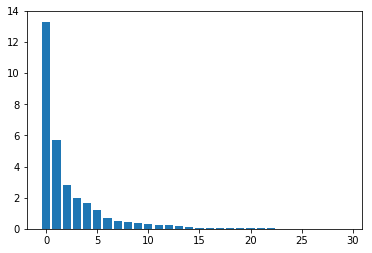

In [10]:
plt.bar(range(len(pca.explained_variance_)),pca.explained_variance_)
plt.show()

In [11]:
params_log={
    'C':powers
}
model=GridSearchCV(LogisticRegression(),params_log,cv=5,n_jobs=-1)
model.fit(X_scaled,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
model.best_params_

{'C': 0.1}

In [13]:
model.best_score_

0.9824253075571178

In [14]:
X_scaled_pca = PCA(n_components=9).fit_transform(X_scaled)
model=GridSearchCV(LogisticRegression(),params_log,cv=5,n_jobs=-1)
model.fit(X_scaled_pca,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
 X_scaled_pca.shape


(569, 9)

In [16]:
model.best_params_

{'C': 1}

In [17]:
model.best_score_

0.9824253075571178

In [18]:
pca.singular_values_

array([86.93235745, 56.90677266, 40.04263937, 33.57058877, 30.62887007,
       26.2104161 , 19.60102663, 16.46800391, 15.4017255 , 14.12602481,
       12.93205441, 12.19019359, 11.71889139,  9.4519063 ,  7.31866075,
        6.74106325,  5.81360925,  5.47175363,  5.30591648,  4.21066503,
        4.12971871,  3.95133143,  3.72155031,  3.20519874,  2.96796958,
        2.15709923,  1.98150547,  0.95096438,  0.65273958,  0.27514088])

In [19]:
pca.components_.shape

(30, 30)

In [20]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [22]:
#diabetes prblem remaining

In [10]:
diabetes = datasets.load_diabetes()
X,y= diabetes.data,diabetes.target

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=42)

In [12]:
scaler = StandardScaler()
pca = PCA()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)

In [13]:
params_ridge ={
    'alpha': powers
}

model= GridSearchCV(Ridge(),params_ridge,cv=5,n_jobs=-1)
model.fit(X_train_scaled_pca,y_train)

model.best_params_

model.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.4536748226466356

In [14]:
X_test_scaled = scaler.transform(X_test)

X_test_scaled_pca = pca.transform(X_test_scaled)
model.score(X_test_scaled_pca,y_test)
X.shape

(442, 10)

In [15]:
params_pipe_ridge={
    'lasso__alpha': powers,
    'pca__n_components': range(1,11)
}

pipeline = make_pipeline(StandardScaler(),PCA(),Lasso())
model = GridSearchCV(pipeline,params_pipe_ridge,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0], 'pca__n_components': range(1, 11)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
model.best_params_

{'lasso__alpha': 0.1, 'pca__n_components': 7}

In [17]:
model.best_score_

0.4575816036766833

In [18]:
model.score(X_test,y_test)

0.47876068738877336

In [19]:
diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
print(diabetes.DESCR)

In [172]:
daibetes =datasets.load_diabetes()
X,y=daibetes.data,daibetes.target

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [200]:
params_pipe_ridge={
    'ridge__alpha':powers
}

pipeline = make_pipeline(StandardScaler(),PCA(),Ridge())
model = GridSearchCV(pipeline,params_pipe_ridge,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
model.best_params_

{'lasso__alpha': 0.1, 'pca__n_components': 7}

In [202]:
model.best_score_

0.453643253485792

In [203]:
model.score(X_test,y_test)

0.4776194488626249

In [17]:
params_pipe_ridge={
    'lasso__alpha':powers,
    'pca__n_components': range(1,11)
}

pipeline = make_pipeline(StandardScaler(),PCA(),Lasso())
model = GridSearchCV(pipeline,params_pipe_ridge,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0], 'pca__n_components': range(1, 11)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
model.best_params_

{'lasso__alpha': 0.1, 'pca__n_components': 7}

In [210]:
model.best_score_

0.4575816036766833

In [211]:
model.score(X_test,y_test)

0.47876068738877336

In [212]:
#again db topic

In [5]:
forest = datasets.fetch_covtype()

In [4]:
print(forest.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30Ã—30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <http://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

In [5]:
forest.keys()

dict_keys(['data', 'target', 'DESCR'])

In [5]:
forest.target

array([5, 5, 2, ..., 3, 3, 3])

In [6]:
forest.data.shape

(581012, 54)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(forest.data,forest.target,
                                                test_size=2000,
                                                train_size=2000,
                                                random_state=42,
                                                stratify=forest.target)

In [7]:
del forest

In [8]:
%%time
params_pipe_log= {
    'pca__n_components': [51],
    'logisticregression__C': powers
}
pipeline = make_pipeline(StandardScaler(),PCA(),LogisticRegression())
model= GridSearchCV(pipeline,params_pipe_log,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 1min 14s


In [19]:
model.best_params_

{'lasso__alpha': 0.1, 'pca__n_components': 7}

In [22]:
model.best_score_

0.4575816036766833

In [1]:
#wine
#boston

In [25]:
##svm- supprt vector machine

In [29]:
daibetes =datasets.load_diabetes()
X,y=daibetes.data,daibetes.target

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [24]:
%%time
params_pipe_svc={
    'pca__n_components': range(1,11),
    'linearsvr__C':powers,
}
pipeline = make_pipeline(StandardScaler(),PCA(),LinearSVR())
model = GridSearchCV(pipeline,params_pipe_svc,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

Wall time: 3.07 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
model.best_params_

{'lasso__alpha': 0.1, 'pca__n_components': 7}

In [21]:
model.best_score_

0.4575816036766833

In [23]:
model.score(X_test,y_test)

0.47876068738877336